Weights for  0  degree [0.08618713]
Train Loss for  0  degree 0.705410710542738
Test loss for  0  degree 0.6746070848852764


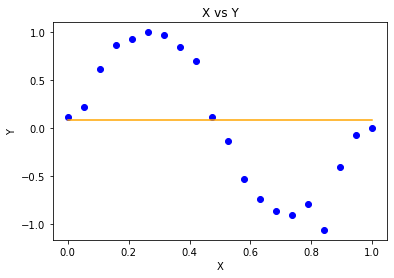

Weights for  1  degree [ 1.08583493 -1.97846963]
Train Loss for  1  degree 0.4933994352444916
Test loss for  1  degree 0.5527621466260281


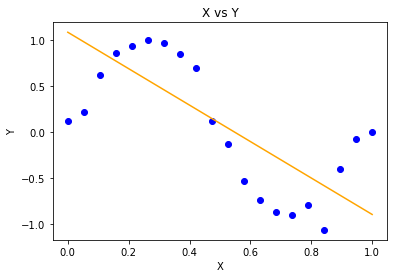

Weights for  2  degree [ 1.2908232  -3.10560186  1.13455949]
Train Loss for  2  degree 0.4605869025326064
Test loss for  2  degree 0.5988175944159435


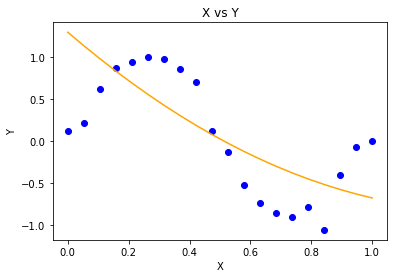

Weights for  3  degree [ 1.52722175 -3.25679517 -1.28592139  2.6567609 ]
Train Loss for  3  degree 0.3893567858167077
Test loss for  3  degree 0.6566312158937342


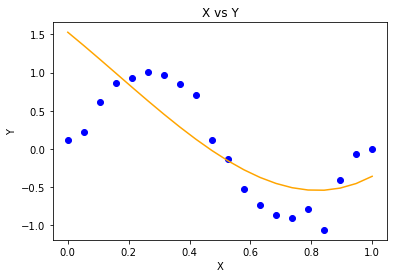

Weights for  4  degree [ 1.50725613 -2.53119068 -2.23878869  0.23970416  2.83623872]
Train Loss for  4  degree 0.3332476088389731
Test loss for  4  degree 0.6358018468134743


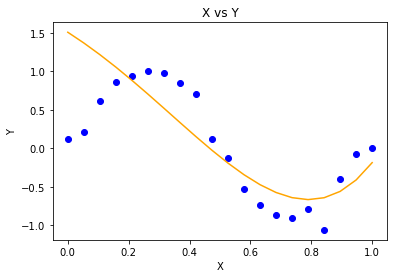

Weights for  5  degree [ 1.40635728 -1.84410018 -2.421205   -0.86177919  1.01564196  2.60012716]
Train Loss for  5  degree 0.28824111377289197
Test loss for  5  degree 0.5920168360743171


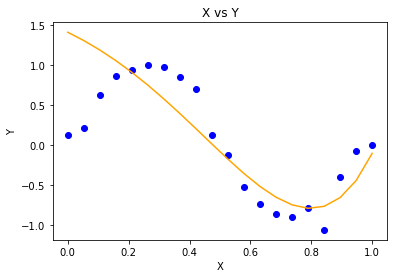

Weights for  6  degree [ 1.31234617 -1.37483717 -2.35258508 -1.32600425  0.09285442  1.32494219
  2.26258017]
Train Loss for  6  degree 0.25565781449638264
Test loss for  6  degree 0.5607005985425002


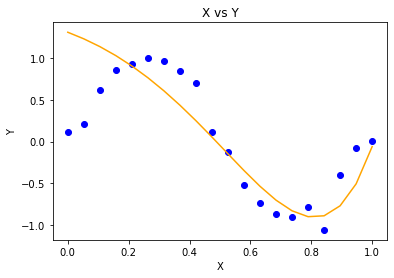

Weights for  7  degree [ 1.24131186 -1.07923818 -2.22626856 -1.50691459 -0.37907794  0.61760476
  1.37617392  1.92148504]
Train Loss for  7  degree 0.2347866286587246
Test loss for  7  degree 0.5485367241997396


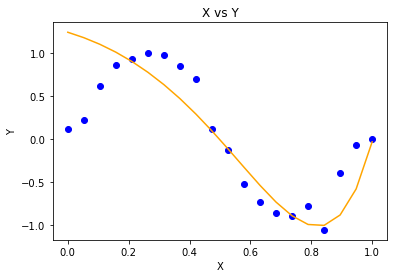

Weights for  8  degree [ 1.19075049 -0.89722759 -2.10407409 -1.56383575 -0.62321485  0.21471079
  0.84898624  1.30053085  1.61381575]
Train Loss for  8  degree 0.22276868200749353
Test loss for  8  degree 0.552112086241927


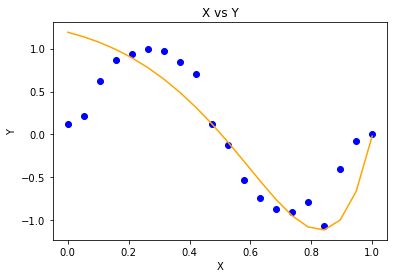

Weights for  9  degree [ 1.15543388 -0.78577651 -2.0022523  -1.5679749  -0.75010151 -0.0209371
  0.5259757   0.91046476  1.17348376  1.35137081]
Train Loss for  9  degree 0.21651867540277267
Test loss for  9  degree 0.5659648284272999


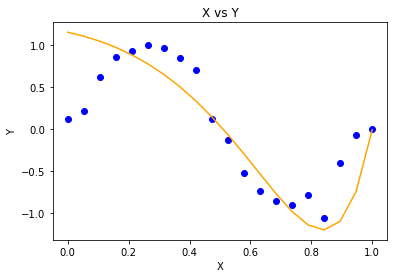

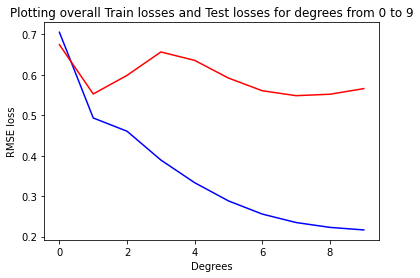

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        #print(self.W)
        #print(Y)
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        #print("Train loss--",train_loss)
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=20
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=20)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 30000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        print("Train Loss for ",i," degree",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        # Visualization
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.title( 'Plotting overall Train losses and Test losses for degrees from 0 to 9' )
    plt.xlabel( 'Degrees' )
    plt.ylabel( 'RMSE loss' )
    plt.show()
 
if __name__ == "__main__" :
     
    main()